 The students' academic performance depends on a number of socio-economic factors like students' attendance in the class, family income, mother's and father's education, teacher-student ratio, presence of trained teacher in school, sex of the student, and distance of schools.

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


To perform EDA (explorative data analysis) on any data set we need to import some of the standard libraries like numpy,pandas , seaborn, msthplotlib.....

In [9]:
data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

Lets perform the data analysis on the student performance data for that we will store the the information which is in a csv file to a variable data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


It gives the information of the index and the column datatypes from the dataframe.

In [11]:
data.shape

(1000, 8)

Shape method is used to find the dimensions of the Data set it would give the total number of rows and columns in the data. 
Here there are 1000 records and 8 columns.

In [12]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

columns method is used to find the names of all the columns in the data set.  
we can get all column names present in the data set.

In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


 head method is used to find the first five or top five records of the data set 
Here we can observe that some columns has numeric values and some are string.


In [14]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


tail method is used to find the last five  records of the data set.

In [15]:
missing = data.isnull()

In [16]:
missing

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


The data should not contain more null values to find whether particular column contain more or less null values we use is null method which would return either true or false if a particular column contain more than 70% null values then that particular column may not be related or useful to the target column to find this we use is null  method if the column is null then it would return true otherwise returns false.

In [17]:
missing = data.isnull().sum()

Here the missing variable contain the data of sum of all the the null values in every particular column

In [18]:
missing

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in the dataset.

In [19]:
data.dtypes.value_counts()

object    5
int64     3
dtype: int64

 The value count method is used to find the sum of all unique value in the particular column here d type value count would give the sum of different data types. 
 My dataset contain 5 categorical columns and 3 numerical columns that is integer columns. 
 

In [20]:
data['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

Describe method is used to give the information that is to describe about the particular column if it is a numerical column it will give the median mode or mean of the data we can find the outliers of the data buy this information that is if the difference between median and mean is more then there is a chance to the outliers in the data. 

Here the mean is 69.169 and the median is 70.0.

In [21]:
data['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

Here the mean is 68.054 and the median is 69.0.

In [22]:
data['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

Here the mean is 66.089 and the medain is 66.00.

#  HISTOGRAM

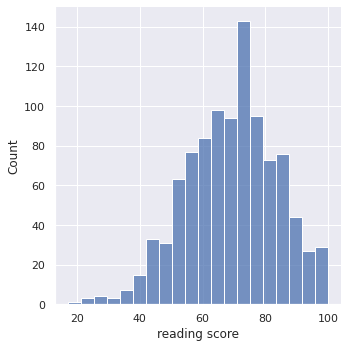

In [23]:
sns.set(rc={'figure.figsize': (12,8)}) 
sns.displot(data['reading score'], kde=False, bins=20);

Using the seaborn library we can draw a histogram.

This would say that most of the students are having reading scores up to 100 and the highest score is 150

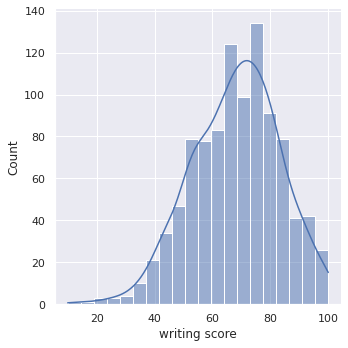

In [24]:
sns.set(rc={'figure.figsize': (12,8)}) 
sns.displot(data['writing score'], kde=True, bins=20);

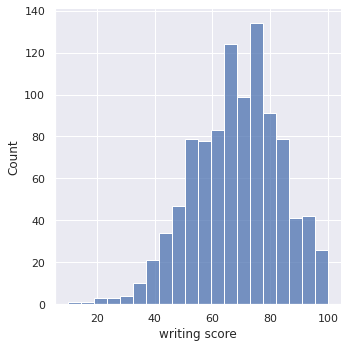

In [25]:
sns.set(rc={'figure.figsize': (12,8)}) 
sns.displot(data['writing score'], kde=False, bins=20);

 
This could say that most of the students are having their writing score in between 80 to 100 and highest score is150

<AxesSubplot:xlabel='reading score', ylabel='Density'>

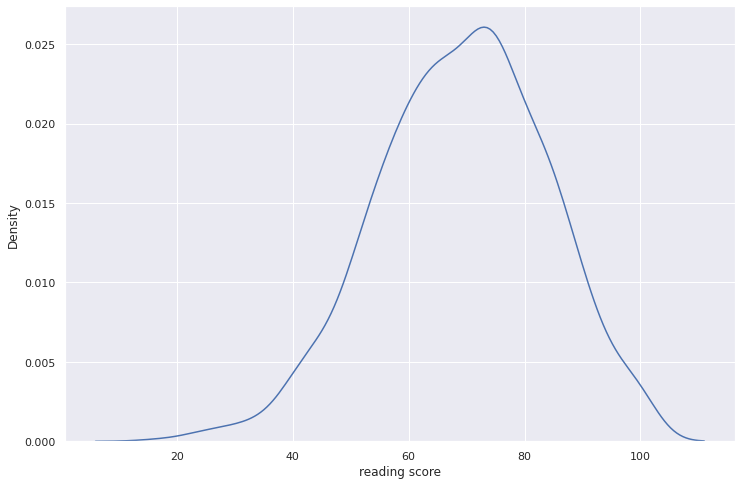

In [26]:
sns.kdeplot(data['reading score'])

It is a distribution plot between the density and the reading scores. 
Here in this plot, peak value is in between 60 and 80.

<AxesSubplot:xlabel='writing score', ylabel='Density'>

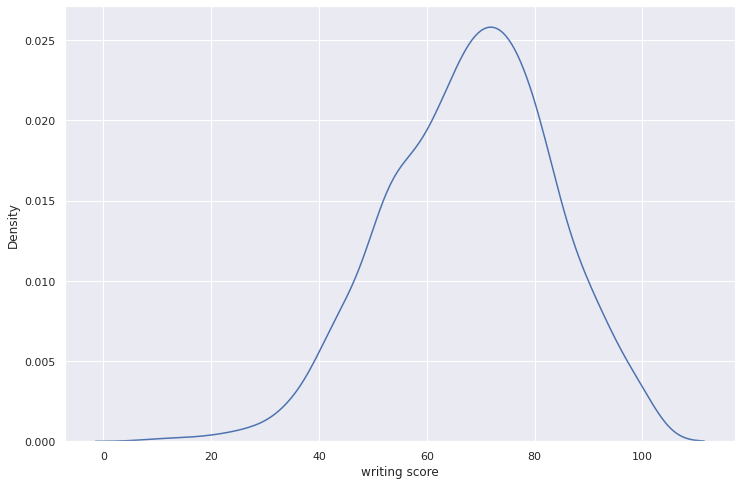

In [27]:
sns.kdeplot(data['writing score'])

 It is a distribution plot between the density and the writing scores.
 Here in this also the peak value is in between 60 and 80.

# SCATTER PLOT

Scatter plots use a collection of points placed using Cartesian coordinates to display values from two variables.By displaying a variable in each axis, we can detect if a relationship or correlation beween the two variables exists.Sctter plots arealso great for observing the spread of the data as they retain the exact data values and samplsize.

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

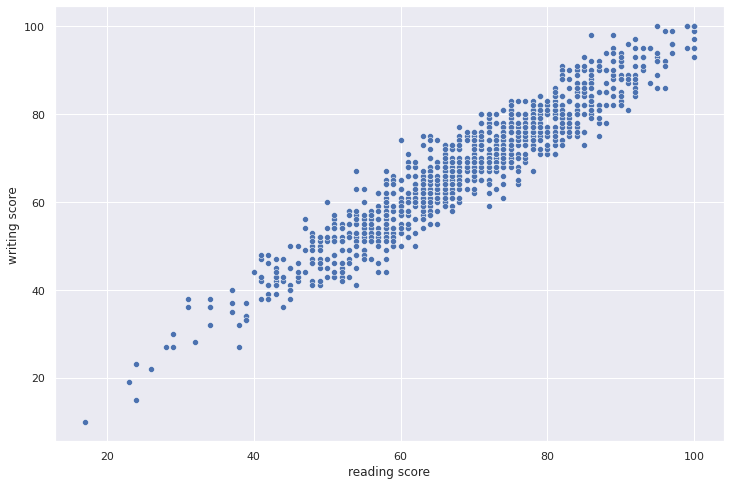

In [28]:
sns.scatterplot(x='reading score', y='writing score', data=data)

Scatterplot is drwan between reading score and writing score.Here, We can clearly observe that range is inceasing.


<AxesSubplot:xlabel='gender', ylabel='writing score'>

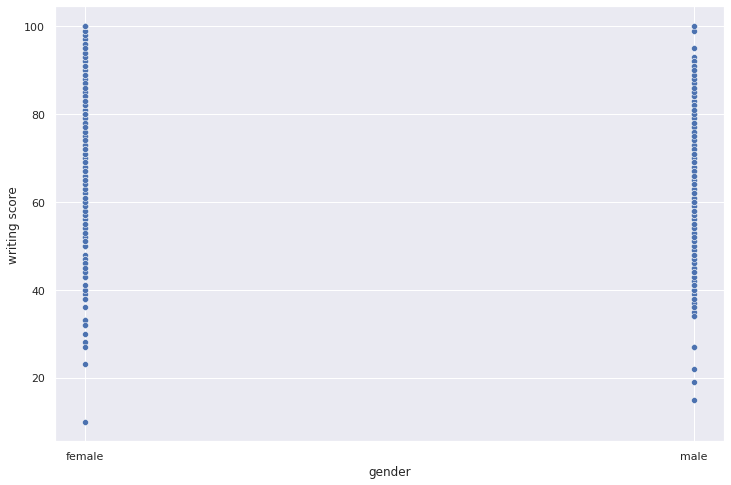

In [29]:
sns.scatterplot(x='gender', y='writing score', data=data)

Scater plot is drawn between the gender and the writing score.

<AxesSubplot:xlabel='gender', ylabel='reading score'>

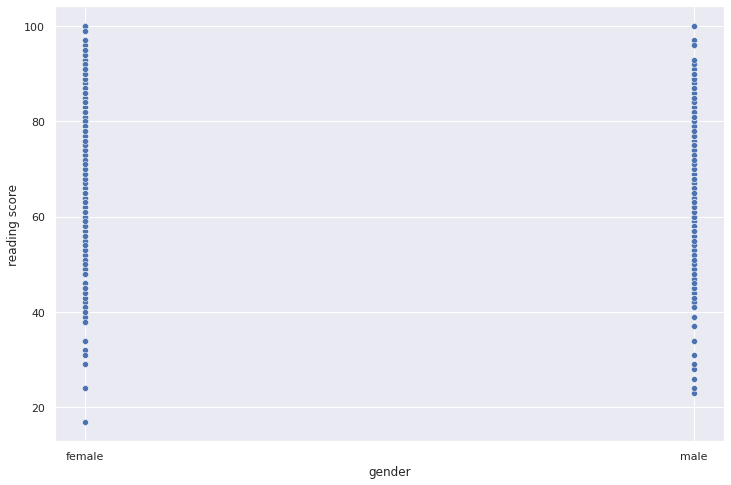

In [30]:
sns.scatterplot(x='gender', y='reading score', data=data)

Scater plot is drawn between the gender and the reading score.

<AxesSubplot:xlabel='gender', ylabel='math score'>

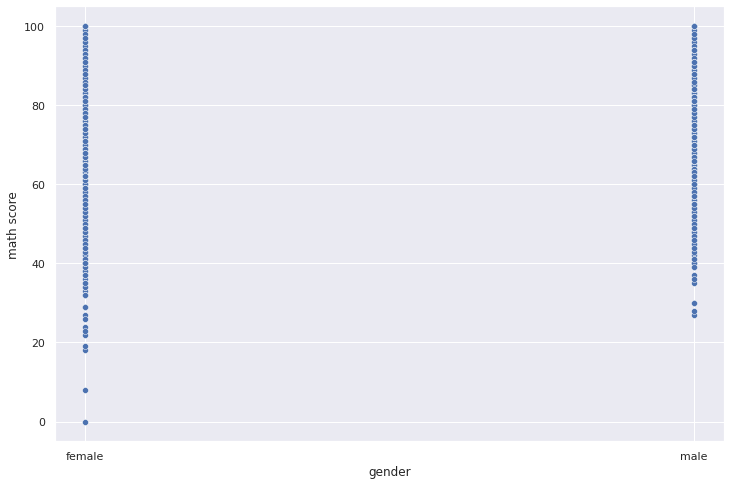

In [31]:
sns.scatterplot(x='gender', y='math score', data=data)

Scater plot is drawn between the gender and the math score.

# CORRELATION

Correlation can be calculated only on numerical coLumns, we can't claculate correlation for non-numeric values.

In [32]:
numeric_features = data.select_dtypes(include = [np.number]) 
numeric_features.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

This is used to find how many columns are having numerical value so which is further used in the graphical representation  for graphs. 
Here numeric columns are stored in variable called number .We can see that nearly 3 columns have numerical values outof 8 columns.

In [33]:
numeric_features1 = data.select_dtypes(exclude = ['O']) 
numeric_features1.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

The other way to find the numerical columns is to exclude all the columns having data types as objects. 
Here numeric columns are extracted exculding strings.

In [34]:
numeric_features.shape, numeric_features1.shape

((1000, 3), (1000, 3))

 This is used to find the the shape of the data having numerical columns only. 
 Here it gave rows and columns, by this we can conclude that 3 columns are numeric outof 8.

In [35]:
categorical_features = data.select_dtypes(include = [np.object]) 
categorical_features.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

By this method we can find the columns which are having categorical values and this method will return columns . 
It gives all the string columns.We have 5 categorical columns outof 8. And they are gender, race/ethnicity, parental level of education, lunch, test preparation course.

In [36]:
categorical_features.shape

(1000, 5)

By running the cell will give the size of the the data having only categorical values.
Here, it gave rows and columns.By this we can conclude that 5 string values are present.

In [37]:
correlation = numeric_features.corr() 
print(correlation['math score'].sort_values(ascending=False), '\n')

math score       1.000000
reading score    0.817580
writing score    0.802642
Name: math score, dtype: float64 



The correlation is calculated only for the numerical values. corr is used to find the correlation between the numerical columns with the target column. Here we are finding the correlation value of the reading score and that is sorted in ascending order.

<AxesSubplot:title={'center':'correlation of numeric features with math score'}>

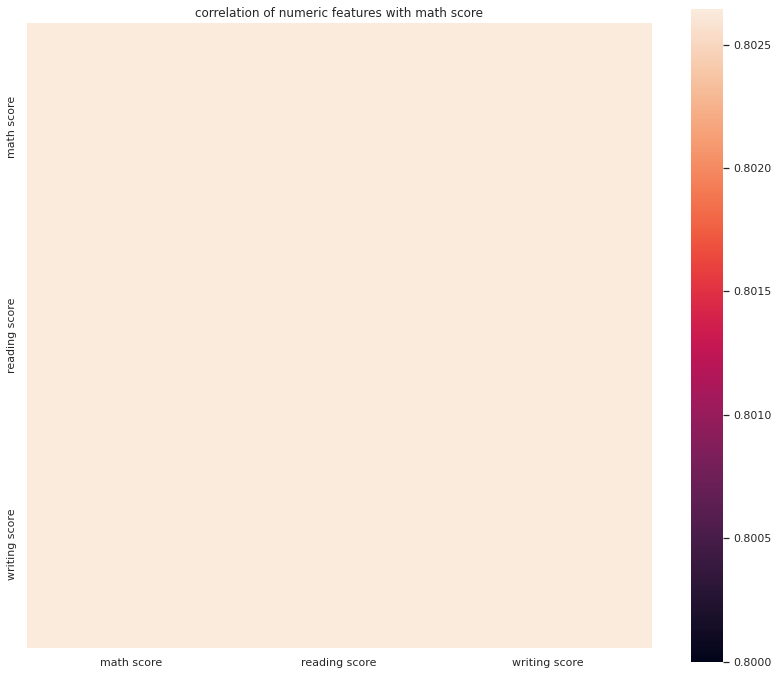

In [38]:
f, ax = plt.subplots(figsize = (14, 12)) 
plt.title('correlation of numeric features with math score') 
sns.heatmap(correlation, square=True, vmax=0.8)

This is the correlation matrix for all the 3 numerical columns.Also named as heat map.

In [39]:
k=5 
cols=correlation.nlargest(k,'math score')['math score'].index 
print(cols)

Index(['math score', 'reading score', 'writing score'], dtype='object')


By this we conclude that top 3 numerical columns are math score, reading score, writing score.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reading score'>

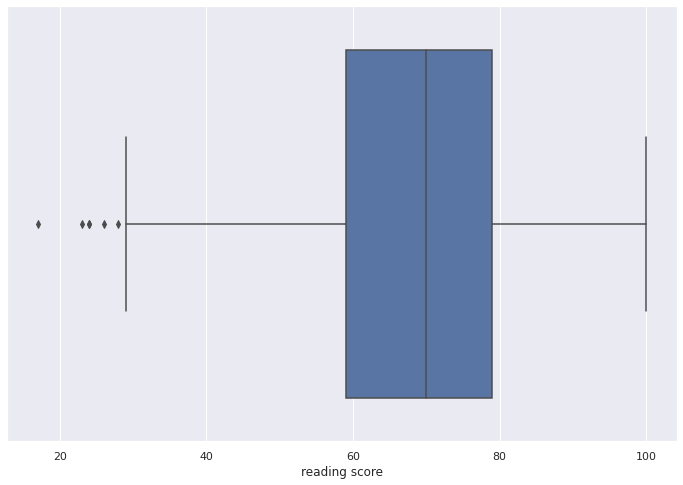

In [40]:
sns.boxplot(data['reading score'])

It is the boxplot on reading score and we can observe that medain is in between 70 to 80.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='writing score'>

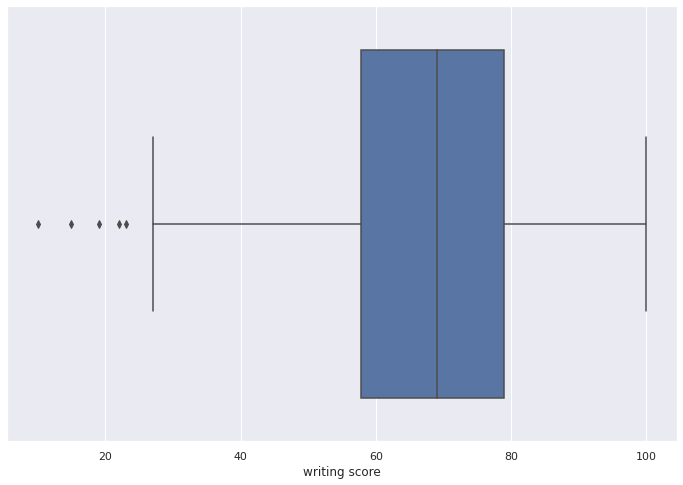

In [41]:
sns.boxplot(data['writing score'])

It is the boxplot on writing score and we can observe that medain is in between 70 to 80.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='math score'>

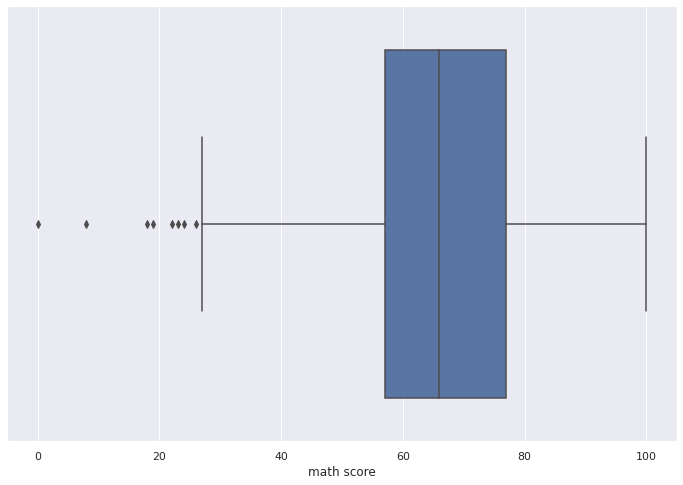

In [42]:
sns.boxplot(data['math score'])

It is the boxplot on reading score and we can observe that medain is in between 65 to 75.

In [43]:
data['reading score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40])

We can observe the array of all the reading scores that has unique values are scores.

In [44]:
data['reading score'].nunique()

72

We can obsevre there are nearly 72 uniques scores got by the students.

In [45]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

We can observe the array of all the parental level of education have unique names.

In [46]:
data['parental level of education'].nunique()

6

We can observe there are 6 unique names.

In [47]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

value counts method is used to count the values.

In [48]:
data['reading score'].value_counts()

72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64

Here we can observe that the common reading scores are calculated.

# VIOLINPLOT

<AxesSubplot:xlabel='reading score', ylabel='race/ethnicity'>

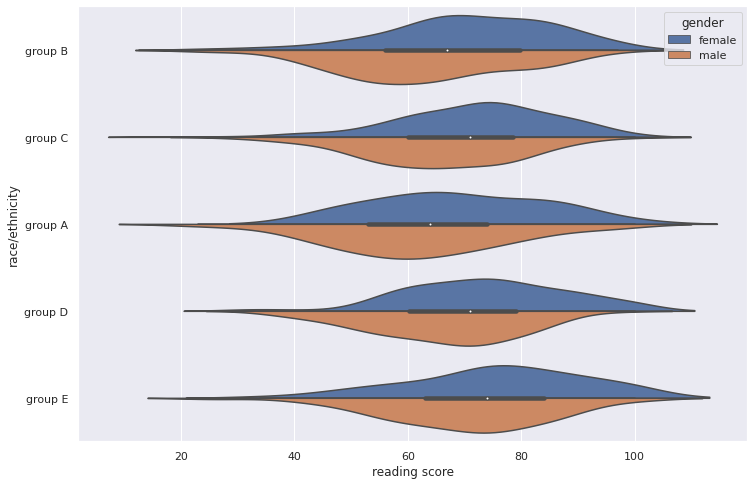

In [49]:
sns.violinplot(x='reading score', y='race/ethnicity', hue='gender', data=data, split=True)

By the above violinplot we can predict the reading score based on the gender and race/ethnicity.

# PAIRPLOT

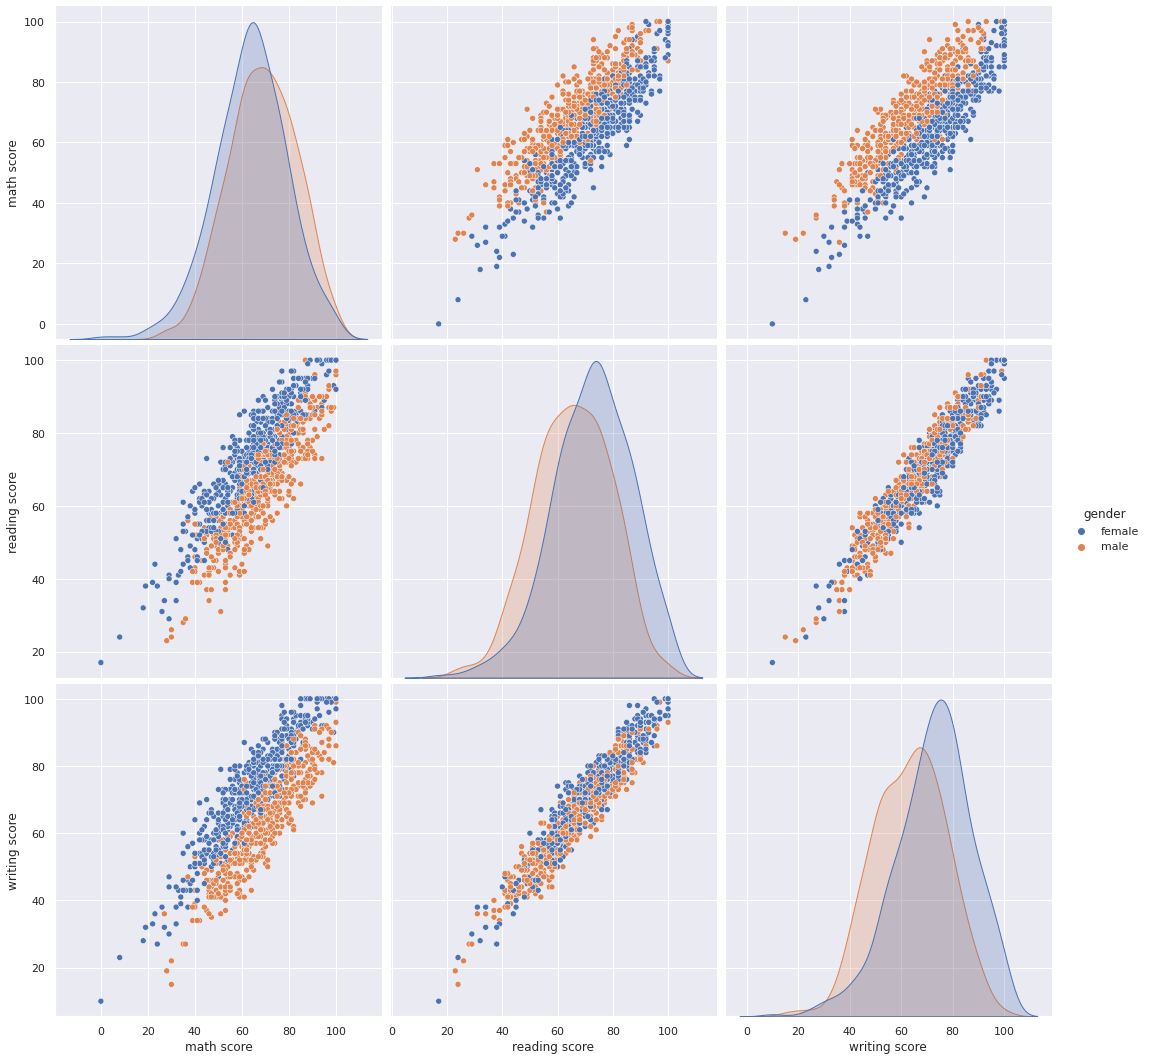

In [50]:
sns.pairplot(data=data, hue='gender', height=5) 
plt.show()

Here is the pairplot for the math score, reading score and writing score (i.e.. numerical columns) based on the gender.

# CONCLUSION

We have come to the end by this we can conclude that each and every point in the student's life is related to his or her education that is even the transportation facility to the school, the distance from the school, number of teachers in the school, playground. 

*The reading and writing skills are related to each other. Most of the students who are good at writing skills are even good at reading skills.  

*Distance is a important factor in studying.  

*In the number of teachers to student ratio is one of the main factor in this data set if there are most teachers in a particular School then supervision on that particular student increases there positively correlated. 

*The distance from the school to the hometown should be less that is most of the  students may not  show interest if the the school is far away from the home hence they are negatively correlated. 

*The next major part of students education is is the parents graduation that is we cannot judge that children of uneducated parents will not study well and even children of graduated parents will study good but most of the graduated parents children are studying good. 

*Both male and female are computing learning process but in some cases female are ahead.Race is not related to the learning process and people with various race are competing each other in the learning process we can even drop the column race from the data because that plays no role in our analysis.  

# The features that are important in the students progress is
      *The the supervision of teachers on a particular student 
      *The distance of the school from the hometown 
      *The hard work they do in a particular subject 
      *Attendance is one of the feature 
      *Personal care of parents towards children education are some of the major features that affect the children's improvement it         in there studies